In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("housing_price.csv")

In [3]:
df

,LotArea,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,GarageArea,GrLivArea,MSSubClass,OverallCond,SalePrice
0,8450,2003,856,856,854,2,3,8,548,1710,60,5,208500
1,9600,1976,1262,1262,0,2,3,6,460,1262,20,8,181500
2,11250,2001,920,920,866,2,3,6,608,1786,60,5,223500
3,9550,1915,756,961,756,1,3,7,642,1717,70,5,140000
4,14260,2000,1145,1145,1053,2,4,9,836,2198,60,5,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,1999,953,953,694,2,3,7,460,1647,60,5,175000
1456,13175,1978,1542,2073,0,2,3,7,500,2073,20,6,210000
1457,9042,1941,1152,1188,1152,2,4,9,252,2340,70,9,266500
1458,9717,1950,1078,1078,0,1,2,5,240,1078,20,6,142125


In [4]:
#Create feature input X and target variable Y
X = df.iloc[:,:12]
Y = df.iloc[:,12]

In [5]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=42)

In [6]:
#import the decision tree regression
from sklearn import tree

#create a regressor object
reg = tree.DecisionTreeRegressor(max_depth=3, random_state=0)

#fit the regressor with X_train and Y_train data
reg.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [7]:
#Test the train model with test set
y_pred = reg.predict(x_test)

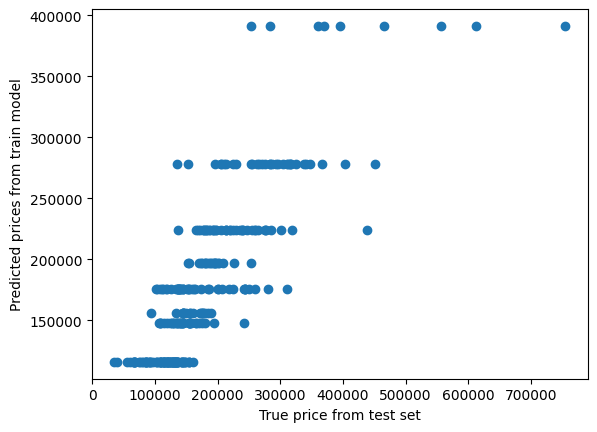

In [8]:
#Scatter plot for orgional data
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("True price from test set")
plt.ylabel("Predicted prices from train model")
plt.show()

In [9]:
from sklearn.metrics import mean_absolute_error as MAE
arr = MAE(y_test, y_pred)
print("Mean absolute of test is: ", arr)

Mean absolute of test is:  33615.65025524834


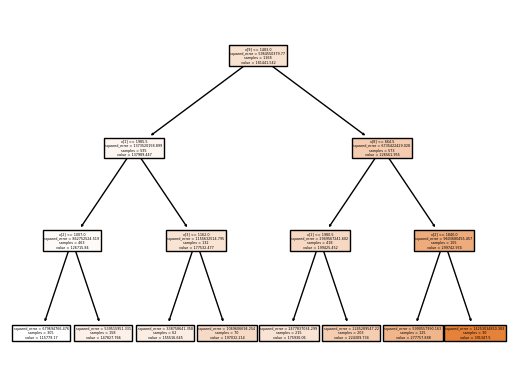

In [10]:
tree.plot_tree(reg, filled = True)
plt.savefig('Decision_tree.pdf')
plt.show()

In [11]:
feat_importance = reg.feature_importances_

In [12]:
print("feat_importance = ", str(feat_importance))

feat_importance =  [0.         0.11547937 0.09495624 0.01284048 0.         0.
 0.         0.         0.25784009 0.51888381 0.         0.        ]


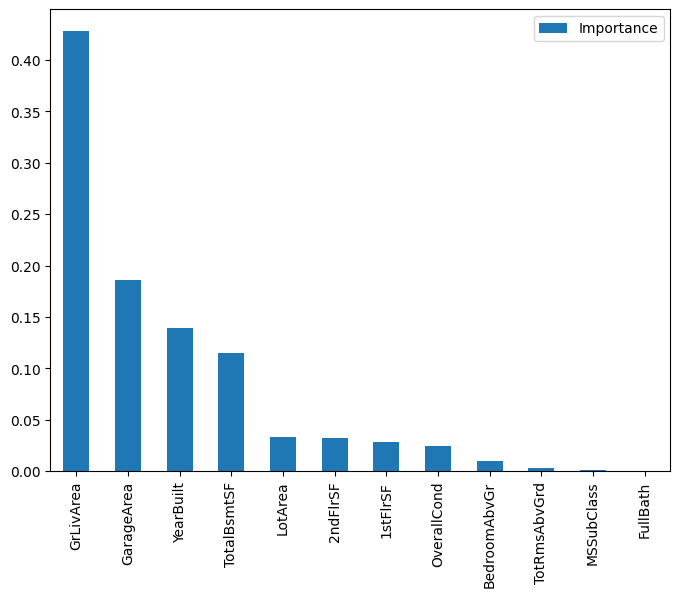

In [16]:
feat_importances = pd.DataFrame(reg.feature_importances_, index =X.columns, columns=["Importance"])
feat_importances.sort_values(by="Importance", ascending= False, inplace= True)
feat_importances.plot(kind='bar', figsize=(8,6))
plt.savefig('Importance.pdf')

In [15]:
train_err = []
test_err = []
for k, depth in enumerate(range(1,10)):
    reg = tree.DecisionTreeRegressor(max_depth= depth, random_state=0)
    reg.fit(X_train, Y_train)
    #compute prices Y_pred from training set X_train
    Y_pred = reg.predict(X_train)
    #compute prices y_pred from test set x_test
    y_pred = reg.predict(x_test)
    train_err.append(MAE(Y_train, Y_pred))
    test_err.append(MAE(y_test, y_pred))

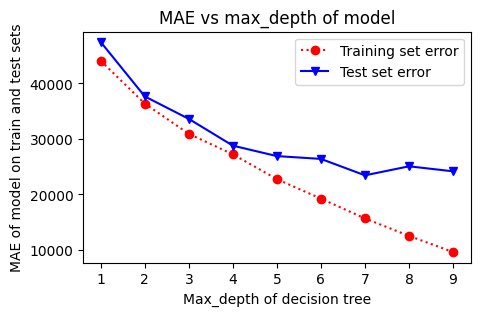

In [20]:
import numpy as np
x = np.linspace(1,9,9)
fig,ax = plt.subplots(figsize = (5,3))
ax.plot(x, train_err, "o:r", label= "Training set error")
ax.plot(x, test_err, "v-b", label= "Test set error")
ax.set_xlabel("Max_depth of decision tree")
ax.set_ylabel("MAE of model on train and test sets")
ax.set_title("MAE vs max_depth of model")
ax.legend()
plt.savefig("MAE_vs_max_depth_of_model.pdf")
plt.show()


Classification decision trees

In [ ]:
#reg = tree.DecisionTreeClassifier(max_depth = 3, random_state= 0)
clf = tree.DecisionTreeClassifier(max_depth= 3, random_state= 0)

#replace reg by clf at all code
#change evaluation metrics (MAE) by accuracy_score(y_test, y_pred)

#using dataset iris 